## Stock shares

A company's 
<a href='https://www.investopedia.com/terms/s/stock.asp'>stock</a>
 share is a piece of the company; more precisely:

A stock (also known as equity) is a security that represents the ownership of a fraction of a 
<a href='https://www.investopedia.com/terms/c/corporation.asp'>corporation</a>
. This
entitles the owner of the stock to a proportion of the corporation's 
<a href='https://www.investopedia.com/terms/c/core-assets.asp'>assets</a>
 and profits equal to how much stock they own. Units of stock are called "shares." 
<a href='https://www.investopedia.com/terms/s/stock.asp'>[1]<a>


An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,
the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The <b>stock ticker</b> is a report of the price of a certain stock, updated continuously throughout the trading session by the various <b>stock</b> market exchanges. In this lab, you will use the  <i><u>y-finance API</u></i> to obtain the stock ticker and extract information about the stock. You will then be asked questions about your results.  

    
You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the yfinance library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.


#### Tabel of Contents
- Using yfinance to Extract Stock Info
- Using yfinance to Extract Historical Share Price Data
- Using yfinance to Extract Historical Dividends Data
- Exercise

In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd

### Using yfinance Lib to extract Stock Data

In [3]:
apple = yf.Ticker("AAPL") 

In [4]:
type(apple)

yfinance.ticker.Ticker

here Ticker symbol for Apple is APPL

### Stock Info

Now we can access functions and variables to extract the type of data we need.

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [5]:
apple.info #type is dict

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

Creating the info json file for the apple.info data

In [6]:
import json

data = json.dumps(apple.info) # convert dict to string

with open('apple.json', 'w') as f:
    f.write(data)

In [7]:
# we can get country by: 
apple.info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [8]:
apple_share_price_data = apple.history(period = 'max')

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [9]:
apple_share_price_data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094693,0.094693,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0
1980-12-19 00:00:00-05:00,0.097720,0.098152,0.097720,0.097720,48630400,0.0,0.0
1980-12-22 00:00:00-05:00,0.102476,0.102909,0.102476,0.102476,37363200,0.0,0.0
1980-12-23 00:00:00-05:00,0.106800,0.107233,0.106800,0.106800,46950400,0.0,0.0
1980-12-24 00:00:00-05:00,0.112421,0.112854,0.112421,0.112421,48003200,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [10]:
apple_share_price_data.reset_index(inplace=True)

In [11]:
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094693,0.094693,0.094261,0.094261,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


We can plot the `Open` price against the `Date`:

<AxesSubplot: xlabel='Date'>

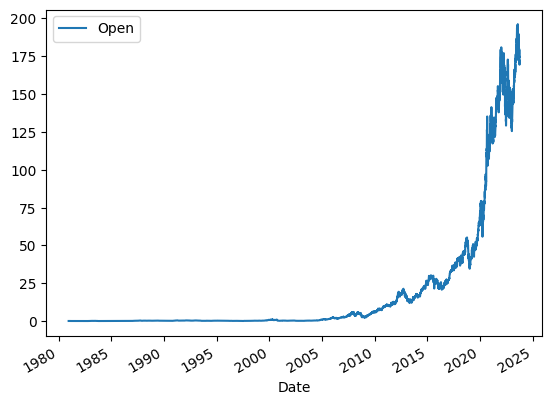

In [12]:
apple_share_price_data.plot(x="Date", y= "Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [13]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
Name: Dividends, Length: 80, dtype: float64

we can plot the dividends overtime:

<AxesSubplot: xlabel='Date'>

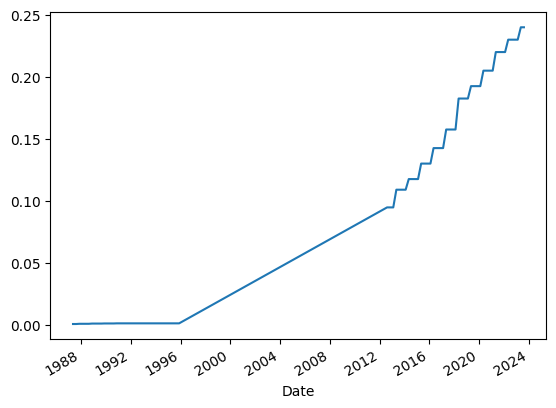

In [14]:
apple.dividends.plot()

### Exercise

In [15]:
amd = yf.Ticker('AMD') # for AMD -Tinker symbol for Advance Micro Devices

In [16]:
amd_info = amd.info

In [18]:
import json
amd_info_data = json.dumps(amd_info)

In [19]:
with open('amd.json' , 'w') as f:
    f.write(amd_info_data)

In [21]:
amd_info['country']

'United States'

In [28]:
amd_info['sector']

'Technology'

In [23]:
amd_df = amd.history(period = 'max')

In [25]:
amd_df.reset_index(inplace = True)

In [27]:
amd_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


In [26]:
amd_df.loc[[0] , ['Volume']] # volume of AMD traded on the first day (first row , volume col)

,Volume
0,219600
